# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Benjamín Escobar Jaramillo
*Métodos computacionales 2025-I*

---

In [1]:
#@title $Imports$
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import quad
import math

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

**Nota:** Recuerde que $\lambda=\frac{\ln{2}}{t_{1/2}}$ con $t_{1/2}$ el tiempo de vida media.

In [ ]:
#Perfecto! a trabajar
#A) Definamos nuestras variables

lambdaSr=(np.log(2))/(10502.395) #los 28.78 años! (Pongamos todo en terminos de días)
lambdaY=(np.log(2))/(2.76) #los 2.76 dias
N=1 #por comodidad, de todas formas dada la naturaleza de las ecuaciones, solo cambiara la escala, no el comportamiento

def Euler(f,Y0,t0,tf,h=0.02): #aca nuestra funciòn Euler (Hagamoslo vectorizado)
  nodos = int((tf - t0) / h) #NODOS
  m = len(Y0) #filas (pues estara de la forma y, y', etc. o en dado caso, sistemas acoplados y,y',x,x')
  t = np.zeros(nodos + 1)
  Yn = np.zeros((m, nodos + 1)) #y aca se guardan las solucines
  t[0] = t0   # Condiciones iniciales
  Yn[:, 0] = Y0
  # Metodo per se
  for k in range(nodos):
      t[k + 1] = t[k] + h      #actuaalizamos tiempo
      Yn[:, k + 1] = Yn[:, k] + h * f(t[k], Yn[:, k])  #actualizamos dato

  return t, Yn

Text(0, 0.5, 'N 90Y')

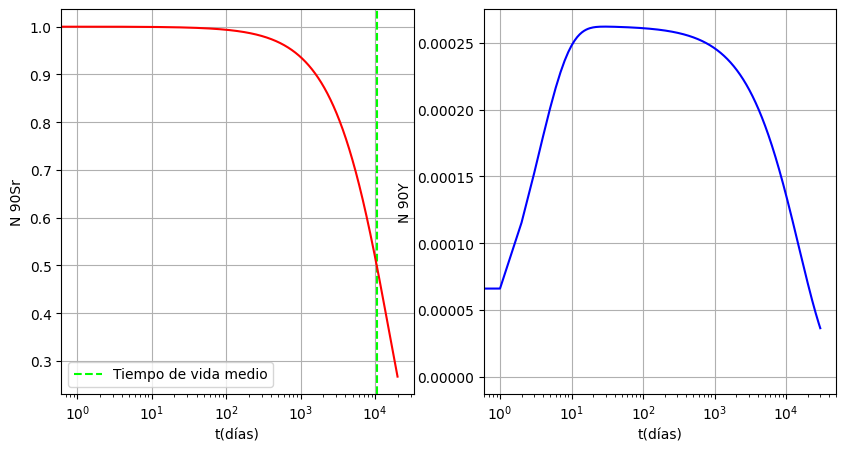

In [ ]:
#Comencemos con Sr!
def Sr(t,sr):
  return -lambdaSr*sr # Por definición...
Y0=np.array([N])
t, sr = Euler(Sr,Y0, 0,20000,h=1)  #Voilá Nuestro sr. Vamos ahora con Y

#Hagamos ahora un nuevo vector de estado por el caracter acoplado de la segunda ecuación!
#Hagamos Nsr=1 y Ny=0, para que se descomponga en el otro
Y00=np.array([1,0])

A = np.array([
    [-lambdaSr, 0],
    [lambdaSr, -lambdaY]]) #voilà nuestra matriz (Inclusive podriamos reoslver ambas)
def fy(t,Y):
    return A @ Y #Voilá la funcion y posteriormente...

ty, nY=Euler(fy,Y00,0,30000,h=1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axvline(10502.395,c='lime',ls='--',label=('Tiempo de vida medio')) #Aqui, podemos observar que en el tiempo de Vida medio, tiene N/2 !
plt.semilogx(t,sr[0],c='r')
plt.grid()
plt.legend
plt.xlabel('t(días)')
plt.ylabel('N 90Sr')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(ty,nY[1],c='b')
plt.grid()
plt.legend
plt.xlabel('t(días)')
plt.ylabel('N 90Y') #Comoprtamiento logico, pues primero esta alimentado por Nsr, y luego, una vez agotado, decae a ritmo de NY!

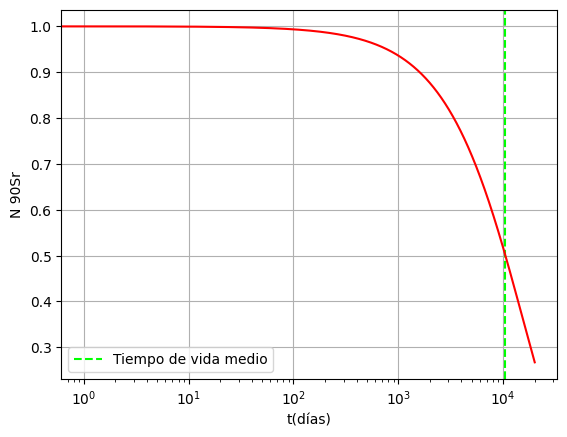

In [ ]:
#Note que la gráfica uno, tambien puede resultar de la matriz acoplada que tenemos
plt.axvline(10502.395,c='lime',ls='--',label=('Tiempo de vida medio')) #Aqui, podemos observar que en el tiempo de Vida medio, tiene N/2 !
plt.semilogx(t,nY[0],c='r') #Usamos la acoplada
plt.grid()
plt.legend
plt.xlabel('t(días)')
plt.ylabel('N 90Sr')
plt.legend() #Y como podemos observar, es análogo


# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

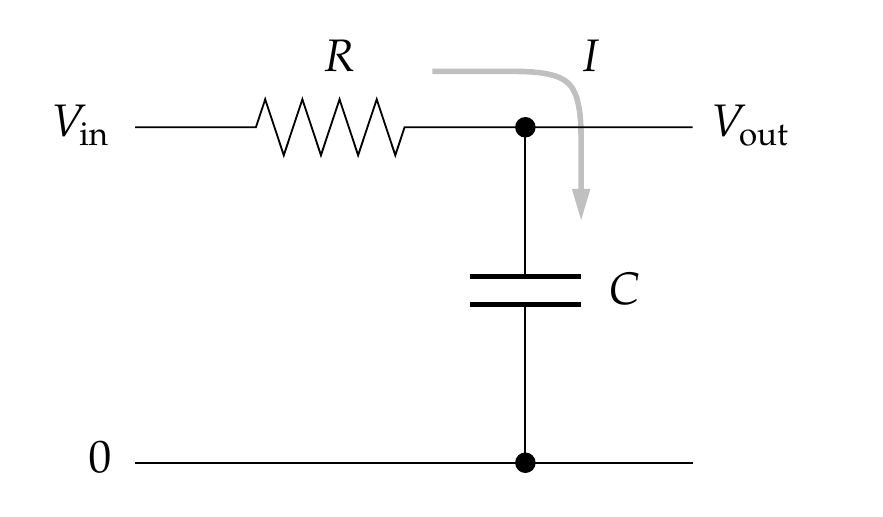

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

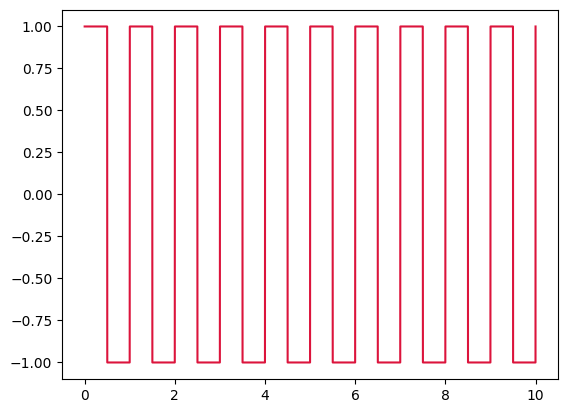

In [ ]:
#Rayos! que cosas! huh? Veamos que se nos ocurre...
#Primero, encargemonos de la pequeñoa locura de Vin
t0,tf=0,10
h=0.001
t=np.arange(t0,tf+h,h) #Voilá los t
#Luego vin
Vin=np.zeros_like(t)

ñ=0
for i in t:
  if (math.floor(2*t[ñ]))%2==0: #si es par...
    Vin[ñ]=1
    ñ+=1 #y actualizamos el contador
  else:  #si no es par, es... Impar! que intuitivo, huh?
    Vin[ñ]=-1
    ñ+=1

plt.plot(t,Vin,c='crimson') #Demos un pequeño vistazo para ver si funcionó Vin... y parece que SI!

In [ ]:
#Bien, ya tenemos Vin, ahora, como lo implementamos en la EDO...? Sencillo:
#Usemos la función construida a partir de arreglos para aprovechar el caracter vectorial de Vin
def RK4_Electric(f1,f2,t0,tf,Y0,Vin,h): #Voilà nuestro RK4 editado
  '''
  Resuelve EDO usando RK4 para filtros pasabajas
  Entradas:
    f: función calleabele dY/dt
    t0,tf: intervalo(float)
    Y0: COndiciones  (array) [y(t0),y'(t0)]
    h: Tamaño de paso (float)

  Salidas:
  tn: Vector de tiempo con paso h array tk+1: tk+h
  Yn:Matriz con las soluciones de Y([y(t),y'(t),y''(t),...])
  '''
  n=int((tf-t0)/h) #numero de pasitos (nodos)
  tn=np.zeros(n+1,dtype=float)
  m=len(Y0) #numero de condiciones iniciales  (filas) (gradp de la EDO)
  Yn=np.zeros((m,n+1),dtype=float) #matriz de soluciones
  #COndiciones iniciales
  tn[0]=t0
  Yn[:,0]=Y0
  for k in range(n):
    if Vin[k]==1: #Aqui es donde hacemos la distinción!!! asi elije una de las dos funciones
      tk=tn[k]
      Yk=Yn[:,k]
      k1=f1(tk,Yk)
      k2=f1(tk+h/2,Yk+h/2*k1)
      k3=f1(tk+h/2,Yk+h/2*k2)
      k4=f1(tk+h,Yk+h*k3)

      Yn[:,k+1]=Yk+(h/6)*(k1+2*k2+2*k3+k4)
      tn[k+1]=tk+h


    elif Vin[k]==-1: #y lo busca automaticamente
      tk=tn[k]
      Yk=Yn[:,k]
      k1=f2(tk,Yk)
      k2=f2(tk+h/2,Yk+h/2*k1)
      k3=f2(tk+h/2,Yk+h/2*k2)
      k4=f2(tk+h,Yk+h*k3)

      Yn[:,k+1]=Yk+(h/6)*(k1+2*k2+2*k3+k4)
      tn[k+1]=tk+h

  return tn,Yn

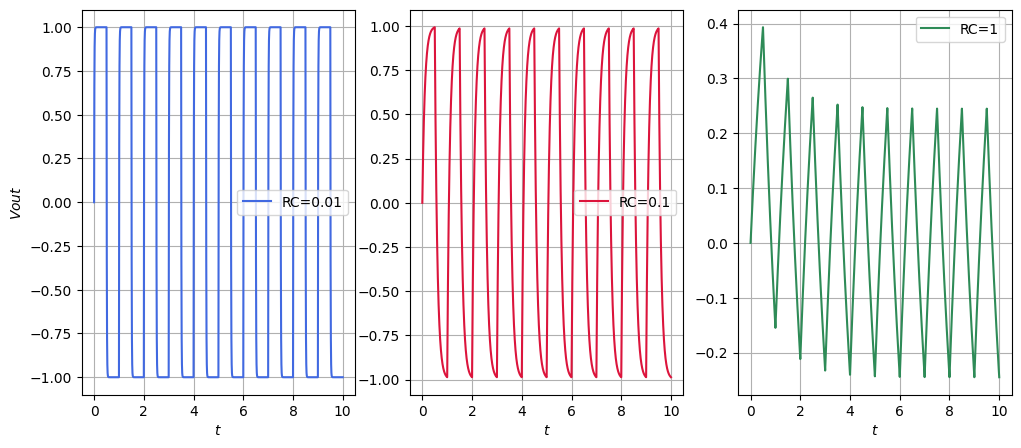

In [ ]:
#Luego, caso 1
Y0=np.array([0.0])
RC=0.01
def f1(t,Y):
  vin=1
  return np.array([(1/(RC))*(vin-Y[0])])


def f2(t,Y):
  vin=-1
  return np.array([(1/(RC))*(vin-Y[0])])

tout1,Vout1=RK4_Electric(f1,f2,t0,tf,Y0,Vin,h=0.001)

#caso 2
RC=0.1
tout2,Vout2=RK4_Electric(f1,f2,t0,tf,Y0,Vin,h=0.001)

#caso 3
RC=1
tout3,Vout3=RK4_Electric(f1,f2,t0,tf,Y0,Vin,h=0.001)
#Y observamos...

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(tout1,Vout1[0],label='RC=0.01',c='Royalblue')
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$Vout$')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(tout2,Vout2[0],label='RC=0.1',c='crimson')
plt.grid()
plt.xlabel('$t$')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(tout3,Vout3[0],label='RC=1',c='seagreen')
plt.grid()
plt.xlabel('$t$')
plt.legend()

# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

In [ ]:
#Bien! sigamos nuestras instrucciones

def my_logistic_eq(t, P, r, K): #Creamos la función..
  return r*P*(1-(P/K))       #Como es de primer orden, no debemos hacer matrices ni cambios de variable. (esa funcion es dp)

#Empleemos valores arbitrarios, para condiciones iniciales y argumentos; inicialmente algo sencillo
P0=np.array([1]) #Condicion inicial
h=0.02 #Paso
t=np.arange(0,20+h,h) #que t0 sea 0 y tf sea 20
r=2
K=3

solRK4=solve_ivp(my_logistic_eq,(0,20),P0,t_eval=t,args=(r,K)) #Voilà! nuestra función, su rango, un t_eval para presición, y los args
#Este solve_ivp fue empleado con RK4, ahora obtengamos los resultados con Euler.

In [ ]:
#Construyamos entonces nuestro Euler para este caso
def EulerP(f,P0,r,K,t0,tf,h=0.02):
  n=int(np.abs((tf-t0)/h)) #la cantidad de elementos que habrán
  P=np.zeros(n+1)
  t=np.zeros(n+1)  #Aqui actualizaremos
  P[0]=float(P0) #y aca nuestras condiciones iniciales
  t[0]=t0

  for i in range(n):
    P[i+1]=P[i]+f(t[i],P[i],r,K)*h
    t[i+1]=t[i]+h

  return t,P

tEu,Peu=EulerP(my_logistic_eq,P0,r,K,0,20) #Y listo! ya tenemos ambos metodos en RK4 y en Euler!

/tmp/ipython-input-2506343210.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[0]=float(P0) #y aca nuestras condiciones iniciales


In [ ]:
#Ahora, hagamos la solución analítica
def p(t):
  return (K*float(P0[0])*np.exp(r*t))/(K+ (float(P0[0])*(np.exp(r*t)-1))) #hacemos la función

yanalitico=p(t) #y como esta vectorizado, podemos hacer esto sin ningun problema

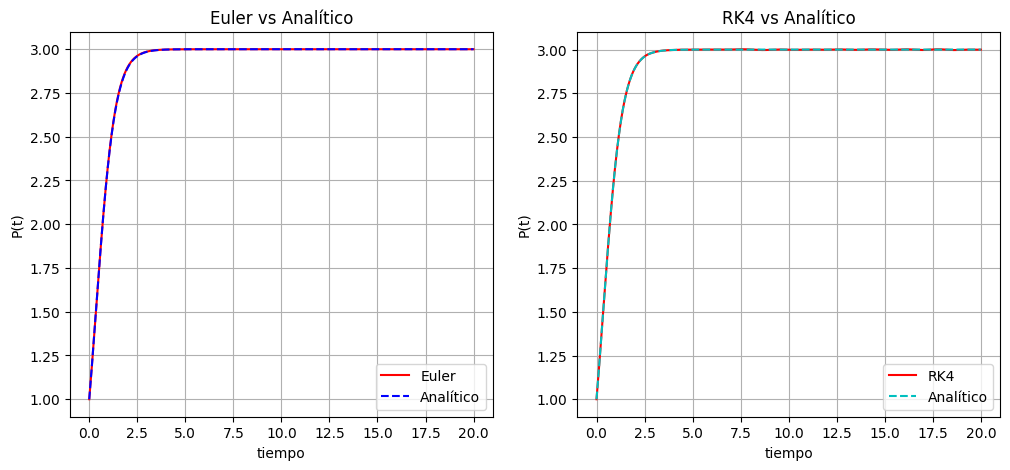

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(tEu,Peu,c='r',label='Euler')
ax[0].plot(t,yanalitico,c='b',ls='--',label='Analítico')
ax[0].grid()
ax[0].set(xlabel=('tiempo'),
          ylabel=('P(t)'))
ax[0].set_title('Euler vs Analítico')
ax[0].legend()

ax[1].plot(solRK4.t,solRK4.y[0],c='r',label='RK4')
ax[1].plot(t,yanalitico,c='c',ls='--',label='Analítico')
ax[1].grid()
ax[1].set(xlabel=('tiempo'),
          ylabel=('P(t)'))
ax[1].set_title('RK4 vs Analítico')
ax[1].legend()

In [ ]:
'''
Ahora, para calcular el error relativo GENERAL de ambos métodos, comparando con el análitico, se propone
el analísis a través de la norma! de este modo podemos ver un mejor global
'''

errEuler=((np.linalg.norm(Peu-yanalitico))/np.linalg.norm(yanalitico))
errRK4=((np.linalg.norm(solRK4.y[0]-yanalitico))/np.linalg.norm(yanalitico)) #Calculamos el error

In [ ]:
print(f'El error global relativo de Euler es {round(errEuler*100,2)}%, mientras que el de RK4 es {round(errRK4*100,2)}%')
#Como podemos observar, RK4 tiene menor error porcentual

El error global relativo de Euler es 0.04%, mientras que el de RK4 es 0.03%


# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0= 2 pi \sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

In [ ]:
#Definamos constantes!!
g=9.81
l=2 #2m

def f(t,Y):  #Creamos la funcion como siempre solemos hacerlo
  dY=np.zeros_like(Y)
  dY[0]=Y[1]
  dY[1]=(-g/l)*np.sin(Y[0])
  return dY

Y0=np.array([1,0]) #Aqui hacemos u0=1
h=0.02
t=np.arange(0,20+h,h)
sol1=solve_ivp(f,(0,20),Y0,t_eval=t)

In [ ]:
Y0=np.array([np.pi/2,0]) #Aqui hacemos u0=pi/2
sol2=solve_ivp(f,(0,20),Y0,t_eval=t)

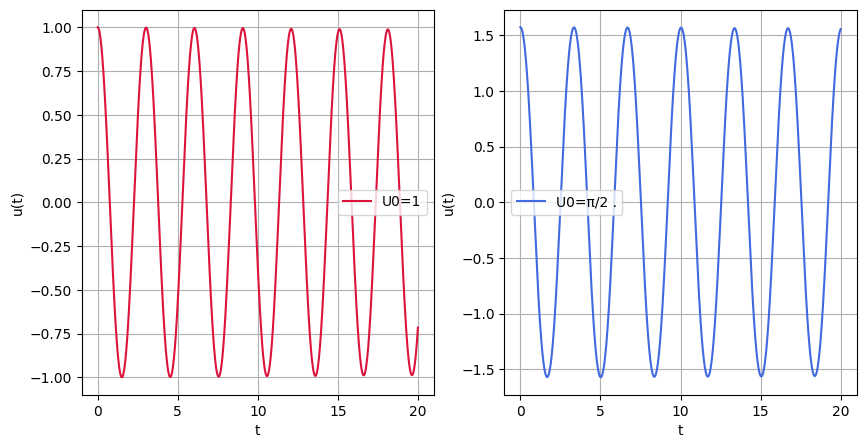

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sol1.t,sol1.y[0],c='crimson',label=('U0=1'))
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol2.t,sol2.y[0],c='royalblue', label='U0=π/2 .')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid()
plt.legend()

In [ ]:
#Bien! esa fue la posición, donde podemos observar claramente las oscilaciones y un sutil decaimiento a través del tiempo
#Ahora, vamos con T/T0
#A) definir nuestro U0
g=9.81
l=2 #2m
u0=np.linspace(-np.pi,np.pi,100) #nuestros u0 posibles
T0=(2*np.pi)*np.sqrt(l/g) #T0
a=(np.sin(u0/2))**2 #Como u esta vectorizado, a tambíen lo estará
#Ahora, para el K, dado que es una integral, tenemos esta solución
ka=np.zeros_like(u0) #aca guardamos k

def funcion(z,a):
  return 1/np.sqrt((1-z**2)*(1-(a*(z)**2))) #Hacemos la función a integrar

for i in range(len(a)):
  ka[i]=quad(funcion,0,1,args=(a[i],))[0] #y voilà! tenemos nuestros k de manera vectorial, por lo cual solo queda....

T=T0*(2/np.pi)*ka #Y listo! Tenemos a T, observemos entonces
TT0=T/T0 #Esto es lo que graficaremos

/tmp/ipython-input-715506469.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.sqrt((1-z**2)*(1-(a*(z)**2))) #Hacemos la función a integrar
/tmp/ipython-input-715506469.py:16: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  ka[i]=quad(funcion,0,1,args=(a[i],))[0] #y voilà! tenemos nuestros k de manera vectorial, por lo cual solo queda....


In [ ]:
#Ahora la hallemos el periodo copmutacionalmente
'''
El plan es sencillo, En nuestra función osciladora, solo debemos encontrar dos ceros (cuando pasa por alli)
Pues, significa que lleva medio trayecto. Por lo cual, al multiplicar ese número por dos, habremos hallado nuestro periodo!
'''
u0=np.linspace(-np.pi,np.pi,100) #Array de U's (tiene ligermos problemas en las fronteras, asi lo corregimos)
def f(t,Y):  #Creamos la funcion como siempre solemos hacerlo
  dY=np.zeros_like(Y)
  dY[0]=Y[1]
  dY[1]=(-g/l)*np.sin(Y[0])
  return dY
Tcomputacional=np.zeros_like(u0) #Aca guardaremos nuestros T computacionales
ñ=0
for i in u0: #Comenzamos el ciclo que halla los T!
  Y0=np.array([i,0]) #Aqui hacemos u0=i (pues lo va a recorrer)
  h=0.002
  t=np.arange(0,30+h,h)
  sol1=solve_ivp(f,(0,30),Y0,t_eval=t) #Listo! Ya tenemos nuestra grafica, es decir (t,sol1.y[0]), Ahora, debemos hallar 2 0's


  cruceszero = np.where(np.diff(np.sign(sol1.y[0])))[0] #Calculamos los cruces
  if len(cruceszero) >= 3: #Aveces si hay cruces!
      t0 = t[cruceszero[0]]
      t1 = t[cruceszero[2]]
      T = t1 - t0
      Tcomputacional[ñ] = T
  else:
      Tcomputacional[ñ] = np.nan  # Aveces no (Como en las fronteras, sin oscilaciones)

  ñ += 1

#Perfecto! procedemos con
TT0Computacional=Tcomputacional/T0

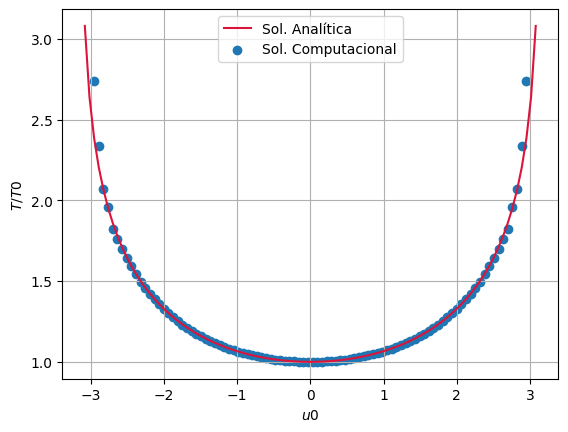

In [ ]:
plt.plot(u0,TT0,c='crimson',label='Sol. Analítica')
plt.scatter(u0,TT0Computacional,label='Sol. Computacional')
plt.grid()
plt.xlabel('$u0$')
plt.ylabel('$T/T0$')
plt.legend() #Eureka! Lo conseguimos y la coincidencia es muuy buena

# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

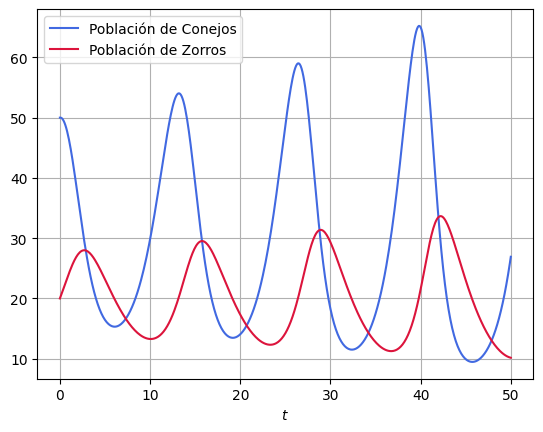

In [ ]:
#Bien... parametros iniciales!
#A)
a=0.8
b=0.04
gamma=0.3
delta=0.01
Y0=np.array([50,20])
#Ahora nuestras funciones acopladas

def matriz(t,XY): #nuestra matriz XY sera de la forma (x,y) con indices (0,1,)
  DXY=np.zeros_like(XY)
  DXY[0]=a*XY[0] - b*XY[0]*XY[1]
  DXY[1]=-gamma*XY[1] + delta*XY[0]*XY[1]  #Voilà, sistema acoplado
  return DXY

h=0.1
t0,tf=0,50
t=np.arange(t0,tf+h,h)

#Ahora definimos nuestro método de Euler (Vectorial sin duda)
def Euler(f,t0,tf,Y0,h):
  n=int((tf-t0)/h) #Numero de columnas o nodos a evaluar de tn
  tn=np.zeros(n+1)
  m=len(Y0) #numero de filas u orden de la EDO
  Yn=np.zeros((m,n+1))#matriz con soluciones
  #COndiciones inciales
  tn[0]=t0
  Yn[:,0]=Y0 #inicializa la matriz en posicino 0(1)con Y0

  for k in range(n):
    tn[k+1]=tn[k]+h
    Yn[:,k+1]=Yn[:,k]+h*f(tn[k],Yn[:,k])
  return tn,Yn

t1,y1=Euler(matriz,t0,tf,Y0,h=h)
plt.plot(t1,y1[0],label='Población de Conejos',c='Royalblue')
plt.plot(t1,y1[1],label='Población de Zorros',c='crimson')
plt.grid()
plt.xlabel('$t$')
plt.legend()

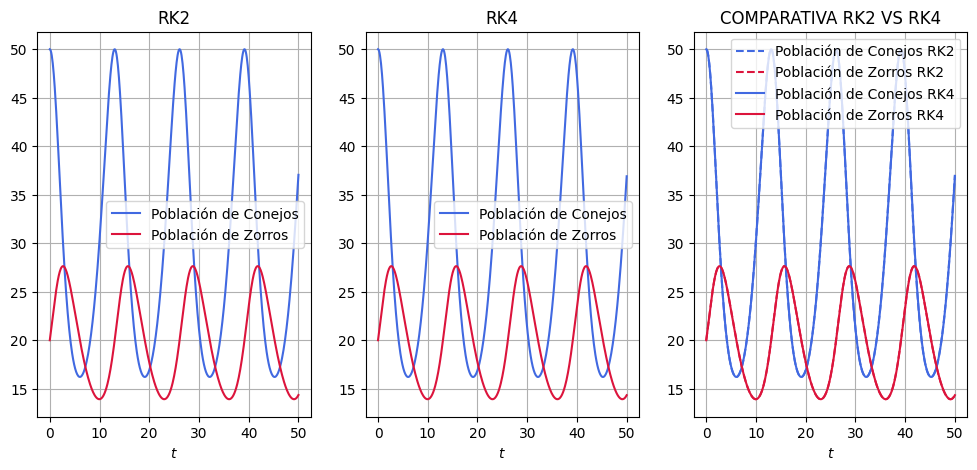

In [ ]:
#B)
def RK2_PM(f,t0,tf,Y0,h): #segundo orden
  n=int(((tf-t0)/h)) #paso
  tn=np.zeros(n+1)
  m=len(Y0)
  Yn=np.zeros((m,n+1))
  tn[0]=t0
  Yn[:,0]=Y0
  for k in range(n):
    tn[k+1]=tn[k]+h
    k1=f(tn[k],Yn[:,k]) #condiciones (los k)
    k2=f(tn[k]+h/2,Yn[:,k]+h/2*k1)
    Yn[:,k+1]=Yn[:,k]+h*k2 #y actualizaciones
  return tn,Yn


def RK4(f,t0,tf,Y0,h): #Y rk4, con documentación!
  '''
  Resuelve EDO usando RK4
  Entradas:
    f: función calleabele dY/dt
    t0,tf: intervalo(float)
    Y0: COndiciones  (array) [y(t0),y'(t0)]
    h: Tamaño de paso (float)

  Salidas:
  tn: Vector de tiempo con paso h array tk+1: tk+h
  Yn:Matriz con las soluciones de Y([y(t),y'(t),y''(t),...])
  '''
  n=int((tf-t0)/h) #numero de nodos
  tn=np.zeros(n+1,dtype=float)
  m=len(Y0) #numero de condiciones iniciales  (filas) (gradp de la EDO)
  Yn=np.zeros((m,n+1),dtype=float) #matriz de soluciones
  #COndiciones iniciales
  tn[0]=t0
  Yn[:,0]=Y0
  for k in range(n):
    tk=tn[k]
    Yk=Yn[:,k]
    k1=f(tk,Yk)
    k2=f(tk+h/2,Yk+h/2*k1)
    k3=f(tk+h/2,Yk+h/2*k2)
    k4=f(tk+h,Yk+h*k3)
    Yn[:,k+1]=Yk+(h/6)*(k1+2*k2+2*k3+k4)
    tn[k+1]=tk+h
  return tn,Yn

t2,solRK2 =RK2_PM(matriz,t0,tf,Y0,h=h) #y voila, nuestros datos
t4,solRK4 =RK4(matriz,t0,tf,Y0,h=h)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(t2,solRK2[0],label='Población de Conejos',c='Royalblue')
plt.plot(t2,solRK2[1],label='Población de Zorros',c='crimson')
plt.title('RK2')
plt.xlabel('$t$')
plt.grid()
plt.legend()

plt.subplot(1,3,2)
plt.plot(t4,solRK4[0],label='Población de Conejos',c='Royalblue')
plt.plot(t4,solRK4[1],label='Población de Zorros',c='crimson')
plt.title('RK4')
plt.xlabel('$t$')
plt.grid()
plt.legend()

plt.subplot(1,3,3)

plt.plot(t2,solRK2[0],label='Población de Conejos RK2',c='Royalblue',ls='--')
plt.plot(t2,solRK2[1],label='Población de Zorros RK2',c='crimson',ls='--')

plt.plot(t4,solRK4[0],label='Población de Conejos RK4',c='Royalblue')
plt.plot(t4,solRK4[1],label='Población de Zorros RK4',c='crimson')

plt.title('COMPARATIVA RK2 VS RK4')
plt.xlabel('$t$')
plt.grid()
plt.legend()
#Este método fue muy diferente a Euler! pero ambos entre sí, son practicamente identicos.

Text(0.5, 1.0, 'Fase')

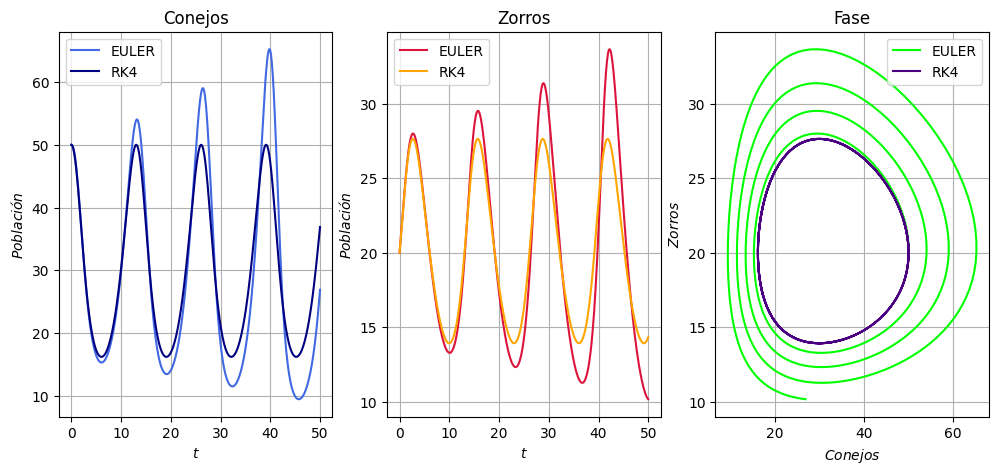

In [ ]:
#Ahora, a comparar!
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
plt.plot(t1,y1[0],label='EULER',c='Royalblue')
plt.plot(t4,solRK4[0],label='RK4',c='navy')
plt.legend()
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$Población$')
plt.title('Conejos')

plt.subplot(1,3,2)
plt.plot(t1,y1[1],label='EULER',c='Crimson')
plt.plot(t4,solRK4[1],label='RK4',c='orange')
plt.legend()
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$Población$')
plt.title('Zorros')

plt.subplot(1,3,3)
plt.plot(y1[0],y1[1],label='EULER',c='lime')
plt.plot(solRK4[0],solRK4[1],label='RK4',c='indigo')
plt.legend()
plt.grid()
plt.xlabel('$Conejos$')
plt.ylabel('$Zorros$')
plt.title('Fase')
#Como podemos observar, el diagrama de Fase debería mostrar un comportamiento cerrado (por los parametros iniciales proporiconados)
#Por lo cual RK4 luce estar mas cerca de la solución Real (vaya que se aleja Euler!)

Text(0.5, 1.0, 'Fase H=0.0005')

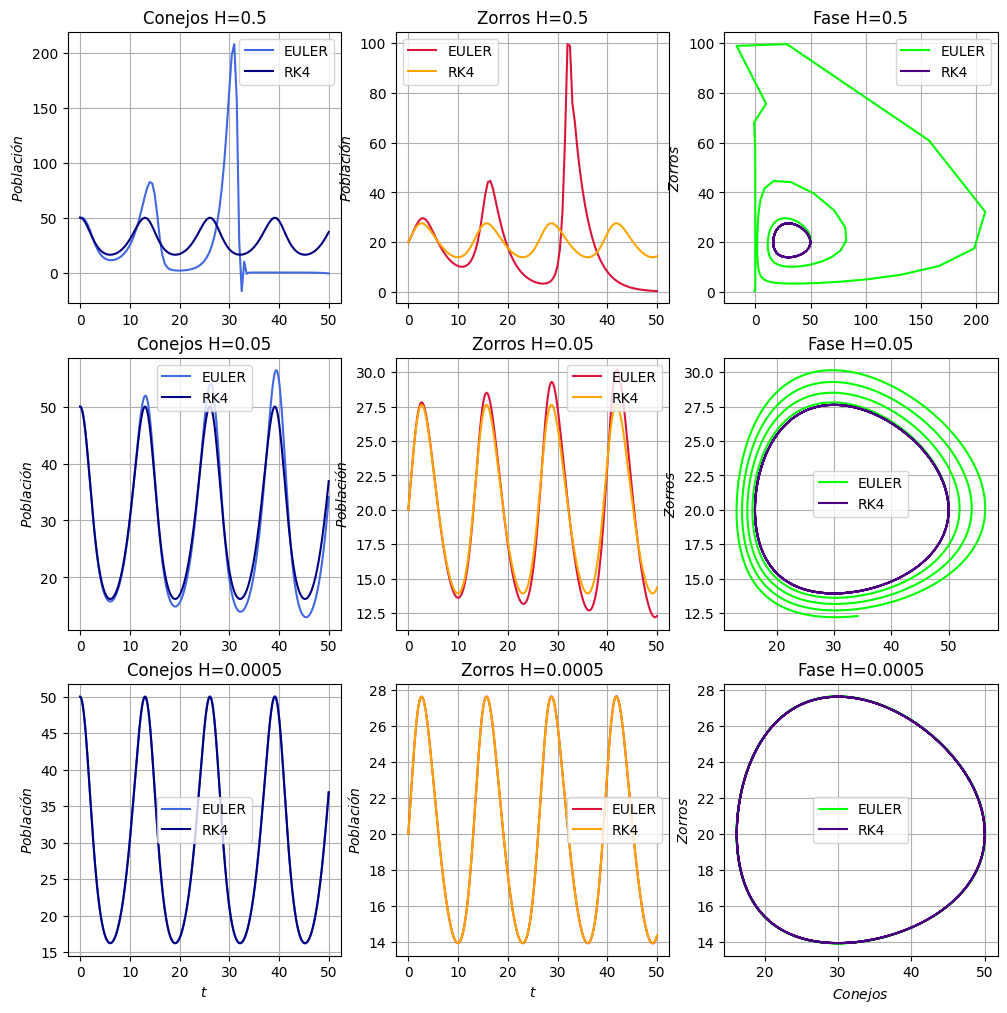

In [ ]:
#D) Alteremos el h, teorizamos (pues lo hemos visto TODO el curso) que con h's menores, todo mejora
h=0.5 #a alterar el h!
t1,y1=Euler(matriz,t0,tf,Y0,h=h)
t4,solRK4 =RK4(matriz,t0,tf,Y0,h=h)

plt.figure(figsize=(12, 12))
plt.subplot(3,3,1)
plt.plot(t1,y1[0],label='EULER',c='Royalblue')
plt.plot(t4,solRK4[0],label='RK4',c='navy')
plt.legend()
plt.grid()
#plt.xlabel('$t$')
plt.ylabel('$Población$')
plt.title('Conejos H=0.5')

plt.subplot(3,3,2)
plt.plot(t1,y1[1],label='EULER',c='Crimson')
plt.plot(t4,solRK4[1],label='RK4',c='orange')
plt.legend()
plt.grid()
#plt.xlabel('$t$')
plt.ylabel('$Población$')
plt.title('Zorros H=0.5')

plt.subplot(3,3,3)
plt.plot(y1[0],y1[1],label='EULER',c='lime')
plt.plot(solRK4[0],solRK4[1],label='RK4',c='indigo')
plt.legend()
plt.grid()
#plt.xlabel('$Conejos$')
plt.ylabel('$Zorros$')
plt.title('Fase H=0.5')


###################################################################

h=0.05 #a alterar el h! ( de nuevo)
t1,y1=Euler(matriz,t0,tf,Y0,h=h)
t4,solRK4 =RK4(matriz,t0,tf,Y0,h=h)




plt.subplot(3,3,4)
plt.plot(t1,y1[0],label='EULER',c='Royalblue')
plt.plot(t4,solRK4[0],label='RK4',c='navy')
plt.legend()
plt.grid()
#plt.xlabel('$t$')
plt.ylabel('$Población$')
plt.title('Conejos H=0.05')

plt.subplot(3,3,5)
plt.plot(t1,y1[1],label='EULER',c='Crimson')
plt.plot(t4,solRK4[1],label='RK4',c='orange')
plt.legend()
plt.grid()
#plt.xlabel('$t$')
plt.ylabel('$Población$')
plt.title('Zorros H=0.05')

plt.subplot(3,3,6)
plt.plot(y1[0],y1[1],label='EULER',c='lime')
plt.plot(solRK4[0],solRK4[1],label='RK4',c='indigo')
plt.legend()
plt.grid()
#plt.xlabel('$Conejos$')
plt.ylabel('$Zorros$')
plt.title('Fase H=0.05')

#################################################################33


h=0.0005 #a alterar el h! ( Un poco mas!!)
t1,y1=Euler(matriz,t0,tf,Y0,h=h)
t4,solRK4 =RK4(matriz,t0,tf,Y0,h=h)




plt.subplot(3,3,7)
plt.plot(t1,y1[0],label='EULER',c='Royalblue')
plt.plot(t4,solRK4[0],label='RK4',c='navy')
plt.legend()
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$Población$')
plt.title('Conejos H=0.0005')

plt.subplot(3,3,8)
plt.plot(t1,y1[1],label='EULER',c='Crimson')
plt.plot(t4,solRK4[1],label='RK4',c='orange')
plt.legend()
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$Población$')
plt.title('Zorros H=0.0005')

plt.subplot(3,3,9)
plt.plot(y1[0],y1[1],label='EULER',c='lime')
plt.plot(solRK4[0],solRK4[1],label='RK4',c='indigo')
plt.legend()
plt.grid()
plt.xlabel('$Conejos$')
plt.ylabel('$Zorros$')
plt.title('Fase H=0.0005')

In [ ]:
#Rayos! Tal como lo predijimos, al hacer h's muy pequeños, obtenemos resultados mas precisos, donde es sobre todo
#notoria la mejora del método de Euler, casi análogo al método de RK4 con estas estabilildades
#Todo esto pues, estamos tomando pasos mas pequeños, es decir, mas datos t's, es decir, mejores aproxiamciones!
#Veamos el error relativo GENERAL
import pandas as pd


#Se omitio el h=0.5 por lo desproporcionado que es (note la gráfica)
t1,y12=Euler(matriz,t0,tf,Y0,h=0.05)
t4,solRK42 =RK4(matriz,t0,tf,Y0,h=0.05)

t1,y13=Euler(matriz,t0,tf,Y0,h=0.0005)
t4,solRK43 =RK4(matriz,t0,tf,Y0,h=0.0005)


error2conejos=(np.linalg.norm(y12[0]-solRK42[0]))/(np.linalg.norm(solRK42[0])) *100
error3conejos=(np.linalg.norm(y13[0]-solRK43[0]))/(np.linalg.norm(solRK43[0])) *100 #Calculamos el error general

error2zorros=(np.linalg.norm(y12[1]-solRK42[1]))/(np.linalg.norm(solRK42[1])) *100
error3zorros=(np.linalg.norm(y13[1]-solRK43[1]))/(np.linalg.norm(solRK43[1])) *100

In [ ]:
bunny={'H=0.05':[error2conejos],'H=0.0005':error3conejos}
fox={'H=0.05':[error2zorros],'H=0.0005':error3zorros}

conejos=pd.DataFrame(bunny)
zorros=pd.DataFrame(fox)
print('Error de Euler asociado a Conejos (%)')
conejos

Error de Euler asociado a Conejos (%)


,H=0.05,H=0.0005
0,7.646177,0.066233


In [ ]:
print('Error de Euler asociado a Zorros (%)')
zorros

Error de Euler asociado a Zorros (%)


,H=0.05,H=0.0005
0,4.616175,0.041002


In [ ]:
#Bien! Ahora solo resta jugar con los parametros iniciales.

Text(0, 0.5, 'Poblacion')

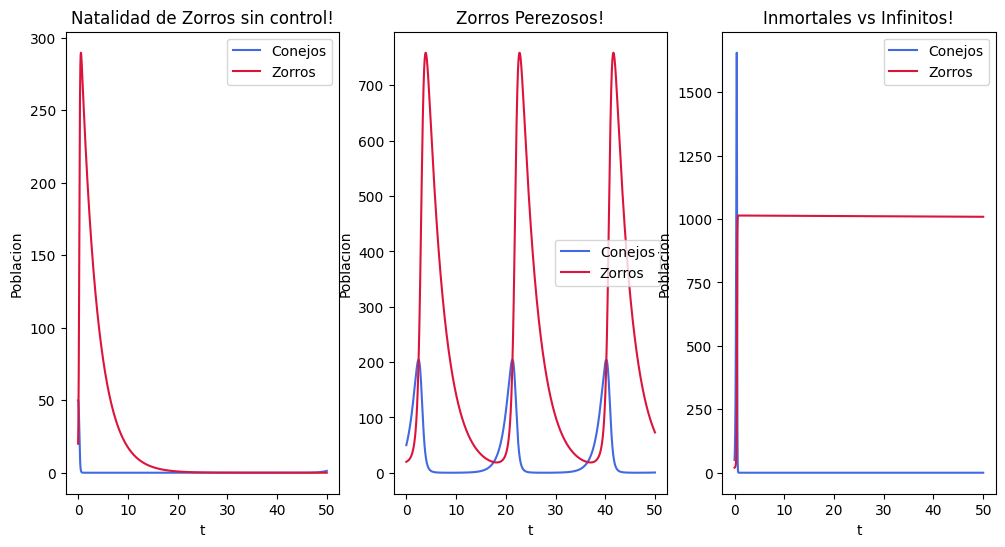

In [ ]:
#Recordemos !!!!
a=0.8 #Tasa de repdoucción de Conejos
b=0.04 #Tasa de depredación de Conejos
gamma=0.3 #Mortalidad natural de los zorros
delta=0.01 #Eficiencia de conversion de presas consumdias en nuevos depredadores
Y0=np.array([50,20])
#Ahora nuestras funciones acopladas

def matriz(t,XY):
  DXY=np.zeros_like(XY)
  DXY[0]=a*XY[0] - b*XY[0]*XY[1]
  DXY[1]=-gamma*XY[1] + delta*XY[0]*XY[1]
  return DXY
#############################################################################################
#A) los Zorros nacen con Mucha frecuencia!

plt.figure(figsize=(12, 6))
a=0.8
b=0.04
gamma=0.3
delta=0.2 #Fiebre de nacimiento Zorril!
Y0=np.array([50,20])

def matriz(t,XY):
  DXY=np.zeros_like(XY)
  DXY[0]=a*XY[0] - b*XY[0]*XY[1]
  DXY[1]=-gamma*XY[1] + delta*XY[0]*XY[1]
  return DXY


plt.subplot(1,3,1)

t1,y1,=RK4(matriz,t0,tf,Y0,h=h)
plt.plot(t1,y1[0],label='Conejos',c='Royalblue')
plt.plot(t1,y1[1],label='Zorros',c='Crimson')
plt.legend()
plt.title('Natalidad de Zorros sin control!')
plt.xlabel('t')
plt.ylabel('Poblacion')
###########################################################################
#B) Zorros MUY perezosos
a=0.8
b=0.004  #Los zorros estan en huelga de trabajo! muy baja tasa de depredación
gamma=0.3
delta=0.01
Y0=np.array([50,20])

def matriz(t,XY):
  DXY=np.zeros_like(XY)
  DXY[0]=a*XY[0] - b*XY[0]*XY[1]
  DXY[1]=-gamma*XY[1] + delta*XY[0]*XY[1]
  return DXY

plt.subplot(1,3,2)
t1,y1,=RK4(matriz,t0,tf,Y0,h=h)
plt.plot(t1,y1[0],label='Conejos',c='Royalblue')
plt.plot(t1,y1[1],label='Zorros',c='Crimson')
plt.legend()
plt.title('Zorros Perezosos!')
plt.xlabel('t')
plt.ylabel('Poblacion')
##############################################################################
#C)Zorros inmortales vs Conejos ultra reproductivos

a=10 #El crecimiento de los conejos es RIDICULO, son basicamente infinitos
b=0.04
gamma=0.0001 #Pero los zorros... se niegan a morir!
delta=0.01
Y0=np.array([50,20])

def matriz(t,XY):
  DXY=np.zeros_like(XY)
  DXY[0]=a*XY[0] - b*XY[0]*XY[1]
  DXY[1]=-gamma*XY[1] + delta*XY[0]*XY[1]
  return DXY

plt.subplot(1,3,3)
t1,y1,=RK4(matriz,t0,tf,Y0,h=h)
plt.plot(t1,y1[0],label='Conejos',c='Royalblue')
plt.plot(t1,y1[1],label='Zorros',c='Crimson')
plt.legend()
plt.title('Inmortales vs Infinitos!')
plt.xlabel('t')
plt.ylabel('Poblacion')

In [ ]:

'''
Cuantas Paradojas!!! En A), logicamente si hay muchos zorros, habrán pocos conejos, y eventualmente, no habrá nada
para nadie! una tragedia natural que tiende a la extinción.
Sorprendentemente, los zorros peresozos... hace aumentar los zorros???? Cuan paradogicó! pero dadas las expresiónes, es consecuente
dado que la depredación esta asociado a los conejos, lo que estamos haciendo implicitamente es aumentar los conejos disponibles para
ser comidos por los zorros! tomando estos la delantera.
Finalmente, en una guerra de titantes entre inmortales contra infinitos, vemos que el claro vencedor son los zorros.
No tienen nada que comer! pero, tampoco morirán de hambre (son inmortales!)! por lo cual, son los conejos quien se ven
recegados a la extinción.
'''

# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


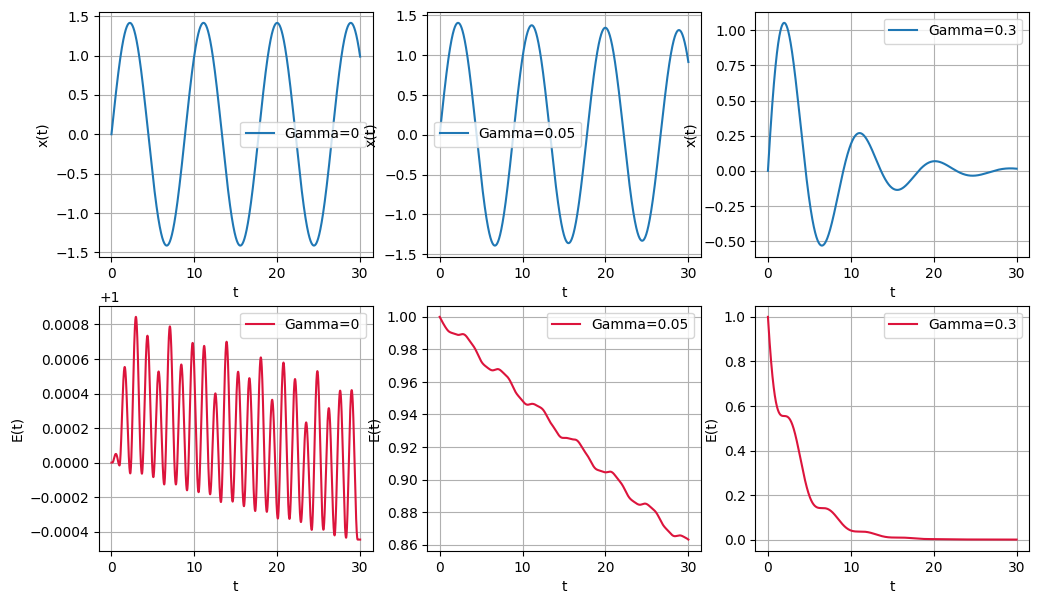

In [ ]:
#Bien!! Definamos unos valores
m=2 #Pues... Por qué no? :)
k=1
w0=np.sqrt(k/m)
gamma=np.array([0,0.005,0.3])
w=np.array([0,0.8*w0,w0])
h=0.001
t0,tf=0,30
t=np.arange(t0,tf+h,h)
Y0=np.array([0,1]) #Condiciones iniciales

#CASO (1)
F=0

############################################################3
#A.1
plt.figure(figsize=(12,7))
def Oscilador(t,Y):
  dY=np.zeros_like(Y)
  dY[0]=Y[1]
  dY[1]=(F/m)-gamma[0]*Y[1]-(w0**2)*Y[0]
  return dY
#Oscilador
sol=solve_ivp(Oscilador,(t0,tf),Y0,t_eval=t)
plt.subplot(2,3,1)
plt.plot(sol.t,sol.y[0],label=('Gamma=0'))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
#Energía
E=(1/2)*m*((sol.y[1])**2) +(1/2)*k*((sol.y[0]))**2

plt.subplot(2,3,4)
plt.plot(sol.t,E,label=('Gamma=0'),c='Crimson')
plt.xlabel('t')
plt.ylabel('E(t)')
plt.legend()
plt.grid()
##########################################################
#A.2
def Oscilador(t,Y):
  dY=np.zeros_like(Y)
  dY[0]=Y[1]
  dY[1]=(F/m)-gamma[1]*Y[1]-(w0**2)*Y[0]
  return dY
#Oscilador
sol=solve_ivp(Oscilador,(t0,tf),Y0,t_eval=t)
plt.subplot(2,3,2)
plt.plot(sol.t,sol.y[0],label=('Gamma=0.05'))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
#Energía
E=(1/2)*m*((sol.y[1])**2) +(1/2)*k*((sol.y[0]))**2

plt.subplot(2,3,5)
plt.plot(sol.t,E,label=('Gamma=0.05'),c='Crimson')
plt.xlabel('t')
plt.ylabel('E(t)')
plt.legend()
plt.grid()
####################################################ç
#A.3
def Oscilador(t,Y):
  dY=np.zeros_like(Y)
  dY[0]=Y[1]
  dY[1]=(F/m)-gamma[2]*Y[1]-(w0**2)*Y[0]
  return dY
#Oscilador
sol=solve_ivp(Oscilador,(t0,tf),Y0,t_eval=t)
plt.subplot(2,3,3)
plt.plot(sol.t,sol.y[0],label=('Gamma=0.3'))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
#Energía
E=(1/2)*m*((sol.y[1])**2) +(1/2)*k*((sol.y[0]))**2

plt.subplot(2,3,6)
plt.plot(sol.t,E,label=('Gamma=0.3'),c='Crimson')
plt.xlabel('t')
plt.ylabel('E(t)')
plt.legend()
plt.grid()
# Note que la energía en Gamma=0 PARECE OSCILAR, pero al revisar la escala, es notrio que es como si fuese una línea recta (cte)

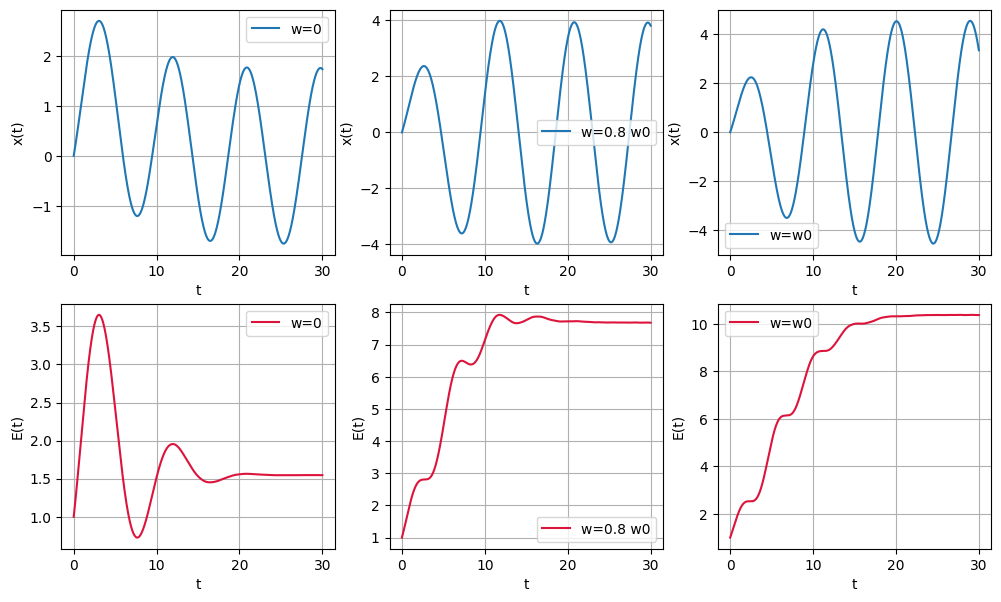

In [ ]:
#Eureka! Procedemos al paso 2. COn el cual hay que tener MUUCHO cuidado.
gamma=0 #Concidion
F0=1
T=10
w=np.array([0,0.8*w0,w0])

#Caso 2
#########################################################################
def F(t):
  return F0*np.cos(w[0]*t)*np.exp((-t**2)/(T**2))
#B.1
plt.figure(figsize=(12,7))

def Oscilador(t,Y):
  dY=np.zeros_like(Y)
  dY[0]=Y[1]
  dY[1]=((F(t))/m)-gamma*Y[1]-(w0**2)*Y[0]
  return dY
#Oscilador
sol=solve_ivp(Oscilador,(t0,tf),Y0,t_eval=t)
plt.subplot(2,3,1)
plt.plot(sol.t,sol.y[0],label=('w=0'))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
#Energía
E=(1/2)*m*((sol.y[1])**2) +(1/2)*k*((sol.y[0]))**2

plt.subplot(2,3,4)
plt.plot(sol.t,E,label=('w=0'),c='Crimson')
plt.xlabel('t')
plt.ylabel('E(t)')
plt.legend()
plt.grid()
########################################################3
#B.2
def F(t):
  return F0*np.cos(w[1]*t)*np.exp((-t**2)/(T**2))

def Oscilador(t,Y):
  dY=np.zeros_like(Y)
  dY[0]=Y[1]
  dY[1]=((F(t))/m)-gamma*Y[1]-(w0**2)*Y[0]
  return dY
#Oscilador
sol=solve_ivp(Oscilador,(t0,tf),Y0,t_eval=t)
plt.subplot(2,3,2)
plt.plot(sol.t,sol.y[0],label=('w=0.8 w0'))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
#Energía
E=(1/2)*m*((sol.y[1])**2) +(1/2)*k*((sol.y[0]))**2

plt.subplot(2,3,5)
plt.plot(sol.t,E,label=('w=0.8 w0'),c='Crimson')
plt.xlabel('t')
plt.ylabel('E(t)')
plt.legend()
plt.grid()
################################################################
#B.3
def F(t):
  return F0*np.cos(w[2]*t)*np.exp((-t**2)/(T**2))

def Oscilador(t,Y):
  dY=np.zeros_like(Y)
  dY[0]=Y[1]
  dY[1]=((F(t))/m)-gamma*Y[1]-(w0**2)*Y[0]
  return dY
#Oscilador
sol=solve_ivp(Oscilador,(t0,tf),Y0,t_eval=t)
plt.subplot(2,3,3)
plt.plot(sol.t,sol.y[0],label=('w=w0'))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
#Energía
E=(1/2)*m*((sol.y[1])**2) +(1/2)*k*((sol.y[0]))**2

plt.subplot(2,3,6)
plt.plot(sol.t,E,label=('w=w0'),c='Crimson')
plt.xlabel('t')
plt.ylabel('E(t)')
plt.legend()
plt.grid()


# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

In [2]:
#Dado el caracter de multiples derivadas parciales, empleemos SymPy
import sympy as sp

In [60]:
#Bien, pues... manos a la obra!
#A) para desarrollar la matriz A, necesitamos a,b,c,d, dado que w=1 y mu en un intervalo, digamos... 0.01
mu=0.01
w=1
#Describamos entonces a U (el potencial)

def r1(x,y):                        #Las distancias en forma de funcion (pues tendremos que derivarlas prontamente!)
  return np.sqrt(((x+mu)**2)+y**2)
def r2(x,y):
  return np.sqrt(((x-1+mu)**2)+y**2)
def U(x,y):                          #Y la función potencial
  r1v=r1(x,y)
  r2v=r2(x,y)
  return -(mu/r1v)- ((1-mu)/r2v)- ((1/2)*w**2)*((x**2)+y**2)

##################################################3333
#Momento! Vamos a derivar! Nuestro UNICO objetivo ahora mismo es obtener a,b,c,d. Entonces... Simbolico!
x, y, mu, w = sp.symbols('x y mu w') #Nuestros simbolos

r1 = sp.sqrt((x + mu)**2 + y**2) #Análogo a nuestras funciones, pero ahora son simbolos
r2 = sp.sqrt((x - 1 + mu)**2 + y**2)
U = -(mu / r1) - ((1 - mu) / r2) - (0.5 * w**2 * (x**2 + y**2))

#Ahora, procedemos a realizar TODAS las derivadas solicitadas
dUdx = sp.diff(U, x)  # dUdx
dUdy = sp.diff(U, y)  # dUdy

d2Udx2 = sp.diff(dUdx, x)  #dUdx**2
d2Udxdy = sp.diff(dUdx, y)  # Derivada dxdy (que por teorema de Clairut es igual a dyddx)
d2Udy2 = sp.diff(dUdy, y)  # dUdy**2

#Perfecto! Ya todo esta listo... ahora, debemos evaluar en L4, el cual es:

L4x=(1/2)-0.01    #Y ahora... como evaluamos...? Lambificando!!
L4y=(np.sqrt(3))/2

fd2Udx2 = sp.lambdify((x, y, mu, w), d2Udx2)
fd2Udxdy = sp.lambdify((x, y, mu, w), d2Udxdy)
fd2Udy2 = sp.lambdify((x, y, mu, w), d2Udy2,)

#Reestablecemos el mu y el w (pues eran simbolos!)
mu_val = 0.01
w_val = 1

# Evaluar en L4
a = fd2Udx2(L4x, L4y, mu_val, w_val)
b = fd2Udxdy(L4x, L4y, mu_val, w_val)
c = fd2Udxdy(L4x, L4y, mu_val, w_val)
d = fd2Udy2(L4x, L4y, mu_val, w_val)

a=abs(a)
d=abs(d)
#Construyendo entonces...
A=np.array([[0,1,0,0],
            [a,0,b,2*w_val],             #Voilà la matrizz
            [0,0,0,1],
            [c,-2*w_val,d,0]])

In [61]:
valp=np.linalg.eigvals(A)
'''
Note que existen partes reales en nuestras soluciones!! Por lo cual... significa que el sistema no es estable?
En absoluto que NO!! Pues con una observación mas precisa, podemos ver que la parte real es del orden de 1e-17! Es practicamente cero!
Por lo tanto nuestro sistema SI es estable
'''
print(valp)


[ 1.83880688e-16+0.96332211j  1.83880688e-16-0.96332211j
 -3.20923843e-16+0.26834775j -3.20923843e-16-0.26834775j]


In [67]:
#Ahora, hallemos ese mu critico! Para ello, tomaremos muchos mu, y lo que haremos es buscar
#La parte REAL mas grande (np.max), y con una tolerancia, digamos... e-2 contará como valor real!

u=np.linspace(1e-15,0.06,60) #nuestro mu a jugar.
propios=np.zeros_like(u)#aca guardamos toda la info
w_val = 1
q=0
for i in u:
  ##################################################3333
  #Momento! Vamos a derivar! Nuestro UNICO objetivo ahora mismo es obtener a,b,c,d. Entonces... Simbolico!
  x, y, mu, w = sp.symbols('x y mu w') #Nuestros simbolos

  r1 = sp.sqrt((x + mu)**2 + y**2) #Análogo a nuestras funciones, pero ahora son simbolos
  r2 = sp.sqrt((x - 1 + mu)**2 + y**2)
  U = -(mu / r1) - ((1 - mu) / r2) - (0.5 * w**2 * (x**2 + y**2))

  #Ahora, procedemos a realizar TODAS las derivadas solicitadas
  dUdx = sp.diff(U, x)  # dUdx
  dUdy = sp.diff(U, y)  # dUdy

  d2Udx2 = sp.diff(dUdx, x)  #dUdx**2
  d2Udxdy = sp.diff(dUdx, y)  # Derivada dxdy (que por teorema de Clairut es igual a dyddx)
  d2Udy2 = sp.diff(dUdy, y)  # dUdy**2

  #Perfecto! Ya todo esta listo... ahora, debemos evaluar en L4, el cual es:

  L4x=(1/2)-i   #Y ahora... como evaluamos...? Lambificando!!
  L4y=(np.sqrt(3))/2

  fd2Udx2 = sp.lambdify((x, y, mu, w), d2Udx2)
  fd2Udxdy = sp.lambdify((x, y, mu, w), d2Udxdy)
  fd2Udy2 = sp.lambdify((x, y, mu, w), d2Udy2,)

  #Reestablecemos el mu y el w (pues eran simbolos!)
  mu_val = i
  w_val = 1

  # Evaluar en L4
  a = fd2Udx2(L4x, L4y, i, w_val)
  b = fd2Udxdy(L4x, L4y, i, w_val)
  c = fd2Udxdy(L4x, L4y, i, w_val)
  d = fd2Udy2(L4x, L4y, i, w_val)

  #Construyendo entonces...
  a=abs(a) #esta edición es a razón del comportamiento de las deriavdas parciales
  d=abs(d)
  A=np.array([[0,1,0,0],
              [a,0,b,2*w_val],             #Voilà la matrizz
              [0,0,0,1],
              [c,-2*w_val,d,0]],dtype=float)

  eigvals = np.linalg.eigvals(A)
  max_real_part = np.max(np.real(eigvals))
  propios[q] = max_real_part
  q+=1 #Y actualizamos a q

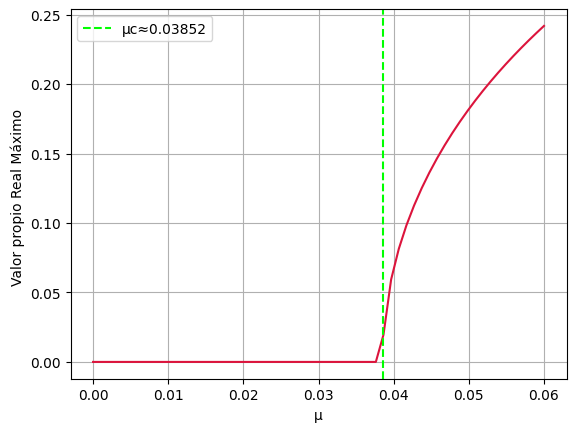

In [69]:
plt.plot(u,propios,c='crimson')
plt.axvline(0.03852,c='lime',ls='--',label='μc≈0.03852')
plt.xlabel('μ')
plt.ylabel('Valor propio Real Máximo ')
plt.grid()
plt.legend()

In [ ]:
#Noten que comportamiento! Tal como la teoría nos indujo, a partir de ese μ crítico, nuestros valores proipos
#EN su forma REAL explotan! lo que singifica una terrible inestabilidad del sistema!

In [85]:
###############veamos estabilidad SOL TIERRA#########################


m1=1.989e30 #kg
m2=5.972e24 #kg

muu=(m2)/(m1+m2)
w=1
#Describamos entonces a U (el potencial)

##################################################3333
#Momento! Vamos a derivar! Nuestro UNICO objetivo ahora mismo es obtener a,b,c,d. Entonces... Simbolico!
x, y, mu, w = sp.symbols('x y mu w') #Nuestros simbolos

r1 = sp.sqrt((x + mu)**2 + y**2) #Análogo a nuestras funciones, pero ahora son simbolos
r2 = sp.sqrt((x - 1 + mu)**2 + y**2)
U = -(mu / r1) - ((1 - mu) / r2) - (0.5 * w**2 * (x**2 + y**2))

#Ahora, procedemos a realizar TODAS las derivadas solicitadas
dUdx = sp.diff(U, x)  # dUdx
dUdy = sp.diff(U, y)  # dUdy

d2Udx2 = sp.diff(dUdx, x)  #dUdx**2
d2Udxdy = sp.diff(dUdx, y)  # Derivada dxdy (que por teorema de Clairut es igual a dyddx)
d2Udy2 = sp.diff(dUdy, y)  # dUdy**2

#Perfecto! Ya todo esta listo... ahora, debemos evaluar en L4, el cual es:

L4x=(1/2)-muu    #Y ahora... como evaluamos...? Lambificando!!
L4y=(np.sqrt(3))/2

fd2Udx2 = sp.lambdify((x, y, mu, w), d2Udx2)
fd2Udxdy = sp.lambdify((x, y, mu, w), d2Udxdy)
fd2Udy2 = sp.lambdify((x, y, mu, w), d2Udy2,)

#Reestablecemos el mu y el w (pues eran simbolos!)
mu_val = muu
w_val = 1

# Evaluar en L4
a = fd2Udx2(L4x, L4y, mu_val, w_val)
b = fd2Udxdy(L4x, L4y, mu_val, w_val)
c = fd2Udxdy(L4x, L4y, mu_val, w_val)
d = fd2Udy2(L4x, L4y, mu_val, w_val)

a=abs(a)#Mismsas razones de deriavdas parciales antes mencionadas
d=abs(d)

#Construyendo entonces...
A=np.array([[0,1,0,0],
            [a,0,b,2*w_val],             #Voilà la matrizz
            [0,0,0,1],
            [c,-2*w_val,d,0]])

valp=np.linalg.eigvals(A)
realval=np.real(valp)
'''
Efectivamente, este sistema es bastante estable, con parte real practicamente cero
'''
print(realval)
print(f'Tambien podemos saber que es ESTABLE si μ, es menor que μ crítico, y nuestro μ fue {round(muu,8)}, el cual es MUCHO menor a 0.03852 ')

[ 1.02695630e-15  1.02695630e-15 -7.46659928e-16 -7.46659928e-16]
Tambien podemos saber que es ESTABLE si μ, es menor que μ crítico, y nuestro μ fue 3e-06, el cual es MUCHO menor a 0.03852 


In [82]:
####################ESTABLIDAD SOL JUPITER ###########################################

m1=1.989e30 #kg Masa sol
m2=1.898e27 #kg Masa Jupiter

muu=(m2)/(m1+m2)
w=1
#Describamos entonces a U (el potencial)

##################################################3333
#Momento! Vamos a derivar! Nuestro UNICO objetivo ahora mismo es obtener a,b,c,d. Entonces... Simbolico!
x, y, mu, w = sp.symbols('x y mu w') #Nuestros simbolos

r1 = sp.sqrt((x + mu)**2 + y**2) #Análogo a nuestras funciones, pero ahora son simbolos
r2 = sp.sqrt((x - 1 + mu)**2 + y**2)
U = -(mu / r1) - ((1 - mu) / r2) - (0.5 * w**2 * (x**2 + y**2))

#Ahora, procedemos a realizar TODAS las derivadas solicitadas
dUdx = sp.diff(U, x)  # dUdx
dUdy = sp.diff(U, y)  # dUdy

d2Udx2 = sp.diff(dUdx, x)  #dUdx**2
d2Udxdy = sp.diff(dUdx, y)  # Derivada dxdy (que por teorema de Clairut es igual a dyddx)
d2Udy2 = sp.diff(dUdy, y)  # dUdy**2

#Perfecto! Ya todo esta listo... ahora, debemos evaluar en L4, el cual es:

L4x=(1/2)-muu    #Y ahora... como evaluamos...? Lambificando!!
L4y=(np.sqrt(3))/2

fd2Udx2 = sp.lambdify((x, y, mu, w), d2Udx2)
fd2Udxdy = sp.lambdify((x, y, mu, w), d2Udxdy)
fd2Udy2 = sp.lambdify((x, y, mu, w), d2Udy2,)

#Reestablecemos el mu y el w (pues eran simbolos!)
mu_val = muu
w_val = 1

# Evaluar en L4
a = fd2Udx2(L4x, L4y, mu_val, w_val)
b = fd2Udxdy(L4x, L4y, mu_val, w_val)
c = fd2Udxdy(L4x, L4y, mu_val, w_val)
d = fd2Udy2(L4x, L4y, mu_val, w_val)

a=abs(a) #Mismsas razones de deriavdas parciales antes mencionadas
d=abs(d)
#Construyendo entonces...
A=np.array([[0,1,0,0],
            [a,0,b,2*w_val],             #Voilà la matrizz
            [0,0,0,1],
            [c,-2*w_val,d,0]])

valp=np.linalg.eigvals(A)
realval=np.real(valp)
'''
Efectivamente, este sistema es bastante estable, con parte real practicamente cero
'''
print(realval)
print(f'Tambien podemos saber que es ESTABLE si μ, es menor que μ crítico, y nuestro μ fue {round(muu,5)}, el cual es menor a 0.03852 ')

[-5.55111512e-17 -5.55111512e-17  6.42576134e-16  6.42576134e-16]
Tambien podemos saber que es ESTABLE si μ, es menor que μ crítico, y nuestro μ fue 0.00095, el cual es menor a 0.03852 


# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


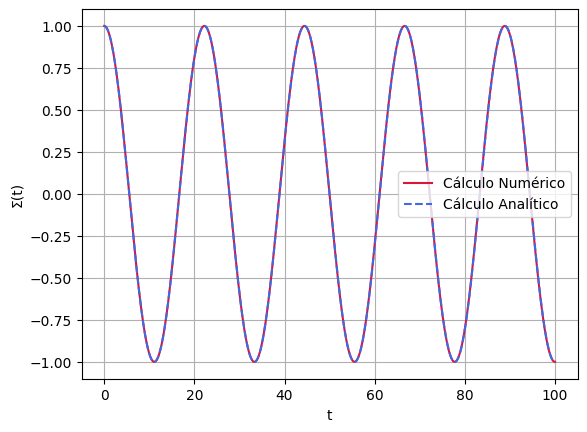

In [ ]:
#Bien, definamos entonces variables!
r=1000 #Para que v(r)=cte=v0, requerimos grandes radios!
v0=200 #m/s, solo es un valor arbitario.
omega=v0/r
k=np.sqrt(2)*omega
#Luego, hallemos sigma(t)
Y0=np.array([1,0]) #En ausencia de condiciones, decimos que x(0)=1, pero v(0)=0
h=0.01
t0,tf=0,100
t=np.arange(t0,tf+h,h)
#Ahora, hallemos los sigmas!
def func(t,Y):
  dY=np.zeros_like(Y)
  dY[0]=Y[1]
  dY[1]=-(k**2)*Y[0]
  return dY
#Eureka! ya tenemos nuestros valores Numéricos. Ahora, proporcionemos los analíticos para comparar
Yreal=Y0[0]*np.cos(k*t)+((Y0[1])/k)*np.sin(k*t)


sol=solve_ivp(func,(t0,tf),Y0,t_eval=t)
plt.plot(sol.t,sol.y[0],c='crimson',label='Cálculo Numérico')
plt.plot(t,Yreal,c='Royalblue',ls='--',label='Cálculo Analítico')
plt.xlabel('t')
plt.ylabel('Σ(t)')
plt.grid()
plt.legend()

#JUEGUE USTED MISMO CON LA GRÁFICA!!
#Se invita a cambiar los valores de Y0, y notará como siempre coinciden perfectamente

In [ ]:
#Bien, vamos ahora con los valores propios de la matriz.
#Nuestra Matriz del sistema resulto asi: dΣ=v , dv=(-k**2)*Σ
#Por lo tanto, con nuestras condiciones iniciales proporcionadas Y0=(0,1), tendriamos
M=np.array([[0,1],
            [-k**2,0]],dtype=float)
valores = np.linalg.eigvals(M) #Luego, hallamos nuestros valores propios
'''
Como podemos observar en el inferior, los valores propios del sistema son +-k, en forma de imaginarios puros, es decir, sin parte real
según lo consultado, tal parece que esto indica una estabilidad en el sistema (oscilaciones constantes), justo como
parece indicar la gráfica!
'''
print(valores)
print(f'k={k}')

[0.+0.28284271j 0.-0.28284271j]
k=0.28284271247461906


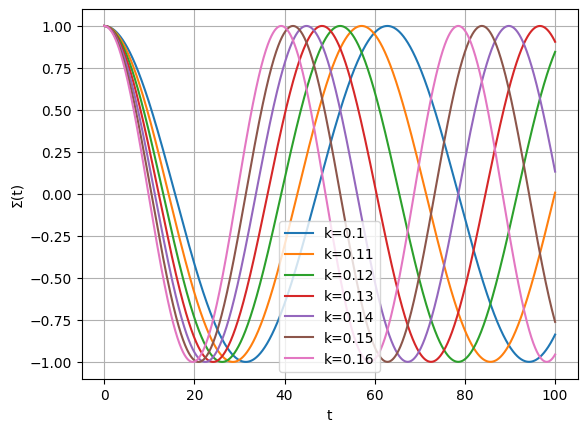

In [ ]:
#Alteremos entonces nuestro K y veamos los cambios
k=np.array([0.1,0.11,0.12,0.13,0.14,0.15,0.16]) #Valores arbitarios de k

for i in k:
  def func(t,Y):
    dY=np.zeros_like(Y)
    dY[0]=Y[1]
    dY[1]=-(i**2)*Y[0]
    return dY


  sol=solve_ivp(func,(t0,tf),Y0,t_eval=t)
  plt.plot(sol.t,sol.y[0],label=(f'k={i}'))
  plt.xlabel('t')
  plt.ylabel('Σ(t)')
  plt.grid()
  plt.legend()

In [ ]:
#Ah-Ha! como podemos observar, al aumentar el K, la frecuencia de oscilación aumenta!
#Segun la grafica, parece seguir habiendo estabilidad, lo cual indicaría que los valres propios siguen siendo +-k imaginario
#Confirmemos!
for i in k:
  M=np.array([[0,1],
            [-i**2,0]],dtype=float)
  valores = np.linalg.eigvals(M)
  print(valores) #Efectivamente, nuestro sistema conserva su estabilidad.

[0.+0.1j 0.-0.1j]
[0.+0.11j 0.-0.11j]
[0.+0.12j 0.-0.12j]
[0.+0.13j 0.-0.13j]
[0.+0.14j 0.-0.14j]
[0.+0.15j 0.-0.15j]
[0.+0.16j 0.-0.16j]


# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

In [ ]:
def leapfrog(f,Y0,t0,tf,h=0.001):
  '''
  Encuentra la solución a un sistema de ecuaciones diferenciales ordinarias de segundo orden
  Entradas:
    f: función de la forma dy'' /dt = f(t) (calleable)
    Y0: condiciones iniciales (narray)
    t0,tf: Tiempo inicial y final (float)
    h(opcional): tolerancia (estandar 0.01)
  Salidas:
    Y: solucion del sistema Y=[x,x'] (narray)
  '''
  n=int(((tf-t0)/h)) #nodos... (como siempre!)
  m=len(Y0) # Condiciones inciales
  Y=np.zeros((m,n+1)) #nuestra matriz solucion, donde guardaremos el sistema
  t = np.zeros(n + 1)
  t[0] = t0
  Y[0][0]=Y0[0] #Posición inicial pero...
  Y[1][0]= Y0[1] #Y aca nuestro primer element, conocido como vn−1/2
  #Y procedemos con LeapFrog!
  vhalf=Y[1][0] + (1/2)*f(t,Y[0][0])*h
  for i in range(n):
    Y[0][i+1]=(Y[0][i])+(vhalf)*h #Y el tiempo! (que depende de la iteración anterior)
    vhalf+=f(t,Y[0][i])*h
    Y[1][i+1]=(vhalf)-(1/2)*f(t,Y[0][i])*h #Actualizamos el vn+1/2
    t[i + 1] = t[i] + h      #actuaalizamos tiempo

  return t,Y #Eureka! Leapfrog esta listo

In [ ]:
#Probemos nuestro auto nuevo!
w=2
def funcc(t,y):
  return -(w**2)*y
Y0=np.array([1,0]) #condiciones iniciales proporcionadas
t0,tf=0,10
t,Y=leapfrog(funcc,Y0,t0,tf)

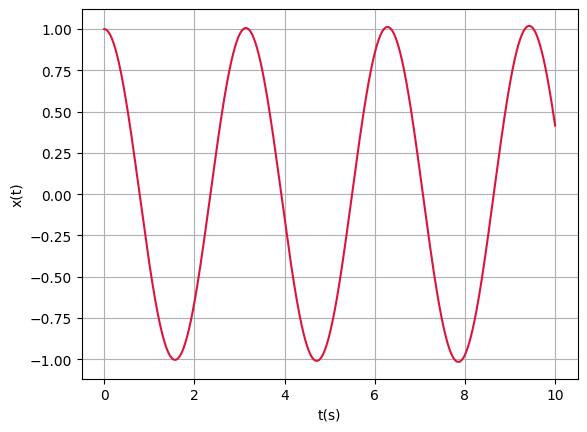

In [ ]:
plt.plot(t,Y[0],c='crimson')
plt.xlabel('t(s)')
plt.ylabel('x(t)')
plt.grid() #Parece funcionar de maravilla

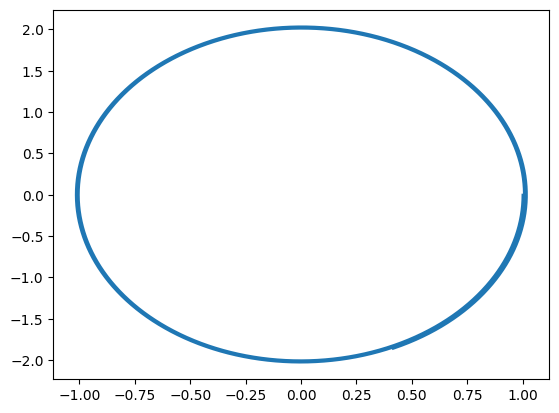

In [ ]:
plt.plot(Y[0],Y[1]) #Y el diagrama de Fase coincide con el comportamiento esperado del oscialdor! Funciona!